<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrices 

1. **Modelo de población de una especie de pajaros** 
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1) 
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros 
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que: 

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix} 
0 & 2 \\
0.3 & 0.5 
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).








In [ ]:
#@title librerías

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
#A es la matriz de coeficientes de la ecuacion de trabajo

A = [[0,2],
     [0.3,0.5]]

m_A = np.array(A)
m_A

array([[0. , 2. ],
       [0.3, 0.5]])

In [ ]:
#miramos ahora como es l vector p_n

#de acuerdo con los datos dados en el enunciado, como hay 0 poblacion joven y 10 hembras, el vector p1 es:

vec = [[0], [10]]

p0 = np.array(vec)
p0

array([[ 0],
       [10]])

In [ ]:
def mat_power(n):
  return np.linalg.matrix_power(m_A,n)

In [ ]:
#verificamos como queda la poblacion para el año siguiente

p1 = mat_power(1) @ p0
p1.astype(int)

array([[20],
       [ 5]])

In [ ]:
#para hallar la razon pedida, hacemos el primero entre el segundo

p1[0] / p1[1]


#lo debemos ver por medio de una gráfica para analizar la convergencia

array([4.])

In [ ]:
razon = np.zeros(100)
pn = np.zeros((100, 2,1))

for i, j in enumerate(range(1,101)):
  pn_ = (mat_power(j) @ p0).astype(int)                      #hacemos el astype para garantizar que la población que tenemos es de numeros enteros
  cociente = pn_[0] / pn_[1]
  razon[i] = cociente
  pn[i] = pn_

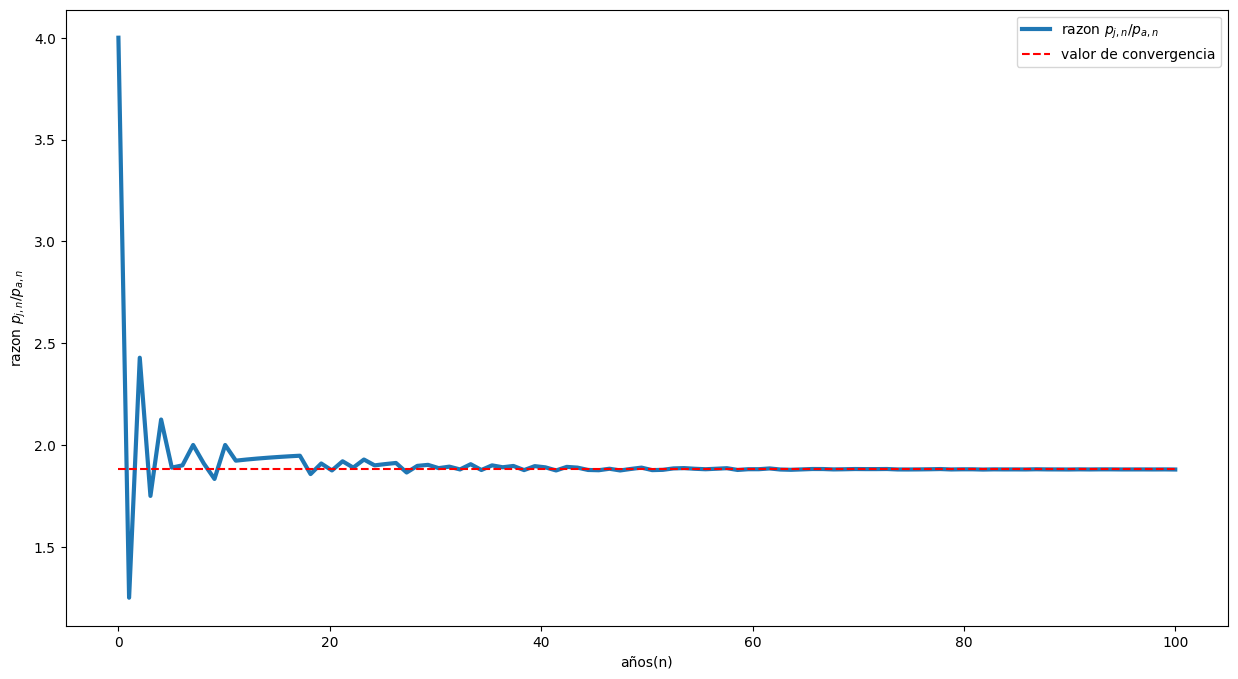

In [ ]:
n = np.linspace(0,100, 100)
valor = np.array([1.88 for i in n])

plt.figure(figsize=(15,8))
plt.plot(n, razon, linewidth = 3, label='razon $p_{j,n} / p_{a,n}$')
plt.plot(n, valor, 'r--', label= 'valor de convergencia')
plt.legend(loc='best')
plt.xlabel('años(n)')
plt.ylabel('razon $p_{j,n} / p_{a,n}$')
plt.show();

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A

In [ ]:
#comenzamos con el calculo de los vectores popios de la matriz a

v_p = np.linalg.eig(m_A)
v_p

(array([-0.56394103,  1.06394103]),
 array([[-0.96246998, -0.88285203],
        [ 0.27138816, -0.46965125]]))

In [ ]:
#vectores propios de la matriz A

v_p_1 = v_p[1][:,0]          #tomar la primera columna
v_p_2 = v_p[1][:,1]          #tomar la segunda columna

v_p_1, v_p_2

(array([-0.96246998,  0.27138816]), array([-0.88285203, -0.46965125]))

In [ ]:
#valores propios de la matriz A

val_prop = v_p[0]
val_prop

array([-0.56394103,  1.06394103])

In [ ]:
p0

array([[ 0],
       [10]])

In [ ]:
#la idea ahora es resolver el sistema po = a1 v1 + a2 v2

a = np.array([[v_p_1[0], v_p_2[0]], [v_p_1[1], v_p_2[1]]])
b = p0
x = np.linalg.solve(a, b)
x

array([[ 12.76497195],
       [-13.91615122]])

In [ ]:
a1, a2 = x[0], x[1]

a1, a2

(array([12.76497195]), array([-13.91615122]))

\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

In [ ]:
#verificamos ahora si se satisface la relación planteada en el enunciado

def pn_(n):
  t1 = val_prop[0] ** n * a1 * v_p_1
  t2 = val_prop[0]**n *(abs(val_prop[1] / val_prop[0]) ** n) * a2 * v_p_2
  return (t1 + t2).astype(int)

In [ ]:
pn[0:10]

array([[[20.],
        [ 5.]],

       [[10.],
        [ 8.]],

       [[17.],
        [ 7.]],

       [[14.],
        [ 8.]],

       [[17.],
        [ 8.]],

       [[17.],
        [ 9.]],

       [[19.],
        [10.]],

       [[20.],
        [10.]],

       [[21.],
        [11.]],

       [[22.],
        [12.]]])

In [ ]:
pn_(0)

array([ 0, 10])

In [ ]:
pn_(1)   

array([-6, -8])

observamos que la formula general no se cumple, aun si rezalizamos algunas modificaciones. Queda pendiente revisarla

2. **Modelo de encriptación** 

Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje. 

La persona que debe recibir el mensaje conoce la matriz de codigo. El o ellla arrelgan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?








In [ ]:
#@title librerías

import numpy as np
from numpy import matrix

In [ ]:
#@title comenzamos con la escitura de la matriz de encriptacion

A = matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])

In [ ]:
np.shape(A)

(5, 5)

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?


In [ ]:
#@title continuamos con la escritura de la matriz que contiene el mensaje

M = matrix([[47,49,-19,257,487],
        [10,-9,63,137,236],
        [ 79,142,-184,372,536],
        [ 59,70,-40,332,588]])
np.shape(M)

(4, 5)

In [ ]:
#@title encontramos el inverso de la matriz de código

inv = A.I
inv

matrix([[ 14.,   1.,  -2.,   1.,  -5.],
        [ 22.,  -7.,  -4.,   6., -19.],
        [ 13.,  -3.,  -2.,   3., -10.],
        [ -2.,   1.,   1.,  -1.,   2.],
        [ -2.,  -0.,  -0.,  -0.,   1.]])

In [ ]:
#@title para hallar la matriz que contiene el mensaje, multiplicamos la matriz encriptada con el inverso de la matriz de código por la derecha

matriz = M @ inv

matriz

matrix([[ 1., 18.,  5., 27., 25.],
        [15., 21., 27.,  8.,  1.],
        [22.,  9., 14.,  7., 27.],
        [ 6., 21., 14., 27., 27.]])

In [ ]:
#@title asignación alfabética

import numpy as np

# Definir el diccionario letras_numeros
letras_numeros = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10,
    'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19,
    'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, ' ': 27
}

In [ ]:
# Definir la función buscar_valor para la correspondencia entre números y letras

@np.vectorize
def buscar_valor(x):
    if isinstance(x, int) and 1 <= x <= 27:
        letra_correspondiente = list(letras_numeros.keys())[list(letras_numeros.values()).index(x)]            #en la lista de claves, ubicamos el que correponde al indice de los valores del diccionario
        return letra_correspondiente

In [ ]:
matriz

matrix([[ 1., 18.,  5., 27., 25.],
        [15., 21., 27.,  8.,  1.],
        [22.,  9., 14.,  7., 27.],
        [ 6., 21., 14., 27., 27.]])

In [ ]:
from numpy.core.multiarray import asarray

#aplicamos ahora la función aterior, para encontrar las correspondencias

matriz = asarray(matriz)                   #redefino mi matriz como un objeto array de numpy
matriz_enteros = np.round(matriz).astype(int)

In [ ]:
#como la función está vectorizada, podemos aplicarla a nuestro array

msg = buscar_valor(matriz_enteros)
msg

array([['A', 'R', 'E', ' ', 'Y'],
       ['O', 'U', ' ', 'H', 'A'],
       ['V', 'I', 'N', 'G', ' '],
       ['F', 'U', 'N', ' ', ' ']], dtype=object)

In [ ]:
union = np.zeros(np.shape(msg)[0], dtype= object)

for i, j in enumerate(msg):
  union[i] = ''.join(j)

union

array(['ARE Y', 'OU HA', 'VING ', 'FUN  '], dtype=object)

In [ ]:
union_final= ''.join(union)
print(f'el mensaje encriptado que es dado es: {union_final}')

el mensaje encriptado que es dado es: ARE YOU HAVING FUN  


3. **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 
a) Diagonalize $A$.<br> 

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.<br>.
c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.<br> 
d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$


In [20]:
#@title librerías

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm, inv

##a) Diagonalize  A .

In [2]:
#@title comenzamos por definir la matriz A

A = np.array([[2, -1, 1],
     [0, 3, -1],
     [2, 1, 3]])

Para diagonalizar una matriz $A$, se necesita encontrar una matriz invertible $P$ tal que $P^{-1}AP$ sea una matriz diagonal $D$. Esto significa que las columnas de $P$ son los autovectores de $A$ y los elementos de la diagonal de $D$ son los autovalores correspondientes de $A$.

In [3]:
#@title procedemos a diagonalizarla

#comenzamos encontrando los vectores propios

eig = np.linalg.eig(A)

P = eig[1]          #P es la matriz de vectores propios
P_inv = np.linalg.inv(P)

D= P_inv @ A @ P

D

array([[ 4.00000000e+00+0.00000000e+00j, -1.52842194e-16-2.31659544e-24j,
        -1.52842194e-16+2.31659544e-24j],
       [-2.38477860e-16-2.55204589e-08j,  2.00000000e+00+4.98918440e-09j,
         4.44089210e-16-1.14010335e-08j],
       [-6.61406338e-16+2.55204589e-08j,  4.44089210e-16+1.18761122e-08j,
         2.00000000e+00-5.46426318e-09j]])

In [4]:
eig

(array([4.+0.00000000e+00j, 2.+1.68652966e-08j, 2.-1.68652966e-08j]),
 array([[-0.57735027+0.00000000e+00j, -0.57735027+9.73718355e-09j,
         -0.57735027-9.73718355e-09j],
        [ 0.57735027+0.00000000e+00j,  0.57735027+0.00000000e+00j,
          0.57735027-0.00000000e+00j],
        [-0.57735027+0.00000000e+00j,  0.57735027-9.73718355e-09j,
          0.57735027+9.73718355e-09j]]))

## b) Use el hecho de que  f(A)=Uf(D)U−1  para encontrar  x(t),y(t),z(t)  en el intervalo de tiempo  [0,2] .

observamos que la forma en la cual nos piden escribir la matriz, es como su descomposicion espectral

U va ser la matriz formada por los vectores propios de A

D va ser la matriz diagonal de A

In [18]:
#matriz de vectores propios de A

U = eig[1]

Para calcular la solucion al sistema, debemos usar $r(t) = e^{At} \mathbf{r}(0) = U e^{Dt} U^{-1} \mathbf{r}(0)$.

In [21]:
#establecimiento de las condiciones iniciales

x0 = 1 #@param {type:"slider", min:0, max:20, step:1}
y0 = 1 #@param {type:"slider", min:0, max:20, step:1}
z0 = 2 #@param {type:"slider", min:0, max:20, step:1}

In [24]:
t = np.linspace(0,2, 100)

In [39]:
def sol(t):
  '''ingrese los valores de tiempo para los cuales quiere calcular la solución'''

  r_t = np.zeros((len(t), 3))  # Crear matriz para almacenar la solución (100 vectores de tamaño 3 cada uno)

  U_inv = np.linalg.inv(U)
  r0 = np.array([x0, y0, z0])

  for i, time in enumerate(t):
      exp_D = expm(D * time)              # Exponencial de la matriz D * t
      r_t[i] = U @ exp_D @ U_inv @ r0      # Calcular la solución para cada valor de tiempo

  return r_t

In [41]:
solucion= sol(t)

<ipython-input-39-bac008215d9d>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  r_t[i] = U @ exp_D @ U_inv @ r0      # Calcular la solución para cada valor de tiempo


In [42]:
np.shape(sol(t))

<ipython-input-39-bac008215d9d>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  r_t[i] = U @ exp_D @ U_inv @ r0      # Calcular la solución para cada valor de tiempo


(100, 3)

In [43]:
x = sol(t)[:,0]
y = sol(t)[:,1]
z = sol(t)[:,2]

<ipython-input-39-bac008215d9d>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  r_t[i] = U @ exp_D @ U_inv @ r0      # Calcular la solución para cada valor de tiempo


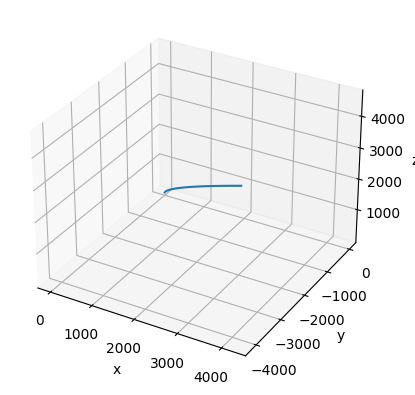

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

##c) Grafique x(t),y(t),z(t) (use la condición inicial  r(0)=(1,1,2))

La grafica que se pide fué realizada en el numeral b y c

##d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

In [5]:
#establecimiento de las condiciones iniciales

x0 = 1 #@param {type:"slider", min:0, max:20, step:1}
y0 = 1 #@param {type:"slider", min:0, max:20, step:1}
z0 = 2 #@param {type:"slider", min:0, max:20, step:1}

In [6]:
#definimos las funciones

#@np.vectorize
def r(t):
  '''ingresar los valores de tiempo como un arreglo de numpy'''

  exp = np.exp(2*t)          #expresion que se usa en repetidas ocasiones en las ecuaciones

  x = (1/2) * x0 * (exp * (1 + exp - 2*t))   + y0 * (-2 * t * exp)      + z0 * (exp * (-1 + exp))
  y = (1/2) * x0 * (-exp * (-1 + exp - 2*t)) + y0 * (2 * (t + 1) * exp) + z0 * (-exp * (-1 + exp))
  z = (1/2) * x0 * (exp * (-1 + exp + 2*t))  + y0 * (2 * t * exp)       + z0 * (exp * (1 + exp))

  return np.array([x, y, z])

In [13]:
t = np.linspace(0, 2, 100)

In [14]:
pos = r(t)
np.shape(pos)

(3, 100)

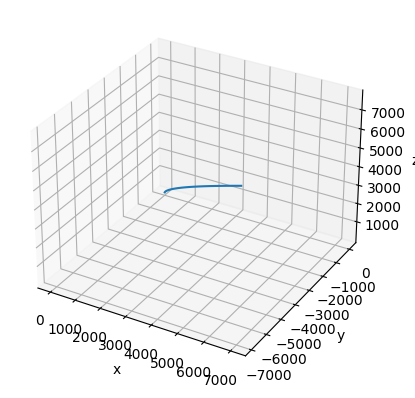

In [15]:
#procedemos ahora a realizar el gráfico tridimensional

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pos[0]
y = pos[1]
z = pos[2]

ax.plot(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

Observamos que en efecto, obtenemos la misma gráfica que se obtuvo con el procedimiento realizado en el numeral b